데이터 전처리

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore') #경고 메시지 무시

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

abalone_path = join('C:/Users/tjoeun/Desktop/새 폴더/abalone.txt')
column_path = join('C:/Users/tjoeun/Desktop/새 폴더/abalone_attributes.txt') #열 이름이 포함된 파일의 경로를 저장

abalone_columns = list()
for l in open(column_path):
    abalone_columns.append(l.strip()) #strip(): 각 줄의 양쪽 공백을 제거

In [2]:
#전복 데이터 불러오기
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
del data['Sex'] #성별 컬럼 제거

In [6]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
data.info() #변수들의 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


Scaling (표준화)

In [9]:
#변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target에 미치는 영향력이 제대로 표현되지 않을 수 있으므로. 대표적으로 Min-Max 스케일링, Standard z-정규화를 이용

##### 1) 모델 불러오기 및 정의하기

In [10]:
from sklearn.preprocessing import MinMaxScaler
mMscaler=MinMaxScaler()

##### 2) 데이터에서 특징 찾기(Min, Max 값)

In [11]:
#nMscaler.fit(data)

##### 3) 데이터 변환

In [12]:
# mMscaled_data = mMscaler.transform(data) 
# mMscaled_data[:5]
# mMscaled_data.min()

In [13]:
# mMscaled_data.max()

In [14]:
mMscaled_data=mMscaler.fit_transform(data) #2번(fit)+3번(transform)을 한 번에 하는 법

In [15]:
mMscaled_data.min()

0.0

In [16]:
mMscaled_data.max()

1.0

##### 4) 결과 살펴보기

In [17]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
mMscaled_data=pd.DataFrame(mMscaled_data, columns=data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


2. Standard Scaling

##### 1) 모델 불러오기 및 정의하기

In [19]:
from sklearn.preprocessing import StandardScaler
sdscaler=StandardScaler()

##### 2) 데이터에서 특징 찾기(Mean, Std 값)

In [20]:
sdscaler.fit(data)

StandardScaler()

##### 3) 데이터 변환

In [21]:
sdscaled_data=sdscaler.transform(data)

##### 4) 결과 살펴보기

In [22]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
sdscaled_data=pd.DataFrame(sdscaled_data, columns=data.columns)

In [24]:
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [25]:
#Iris 데이터로 logistic 회귀분석 결과의 차이점 비교

from sklearn.datasets import load_iris
iris=load_iris()

In [26]:
from sklearn.preprocessing import StandardScaler
iris_std=StandardScaler().fit_transform(iris.data)

In [27]:
import pandas as pd
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df=pd.DataFrame(iris_std, columns=iris.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


- Logistic Regression으로 분류를 수행하며 정규화를 하지 않은 데이터와 스케일러 데이터를 비교

In [29]:
from sklearn.linear_model import LogisticRegression
Irc= LogisticRegression(random_state=2022)

#로지스틱 회귀는 분류 문제에 주로 사용되며, 입력 특성과 클래스 사이의 선형 관계를 모델링함

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=2022
)

In [31]:
Irc.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [32]:
X_train, X_test, y_train, y_test=train_test_split(
    iris_std, iris.target, stratify=iris.target, random_state=2022
)

In [33]:
Irc.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [34]:
Irc.score(X_test, y_test)

0.9473684210526315

MinMaxScaler의 로지스틱 회구분석 결과값

In [35]:
from sklearn.preprocessing import MinMaxScaler
iris_mm=MinMaxScaler().fit_transform(iris.data)

In [36]:
df3=pd.DataFrame(iris_mm, columns=iris.feature_names)
df3.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [37]:
#정규화된 데이터로 학습 시 빨리 목표값에 도달 => 에러가 발생하지 않음
X_train, X_test, y_train, y_test = train_test_split(
    iris_mm, iris.target, stratify=iris.target, random_state=2022)

In [38]:
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.9210526315789473

Sampling

1. Random Over, Under Sampling

2. SMOTE(Synthetic Minority Oversampling Technique)

In [39]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.15, 0.8],
                           class_sep=0.8, random_state=2019)

#수가 적은 클래스의 점을 하나 선택해 K개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성
#데이터의 손실이 없으며, 임의 Over샘플링을 하였을 때보다 과적합을 완화시킬 수 있음

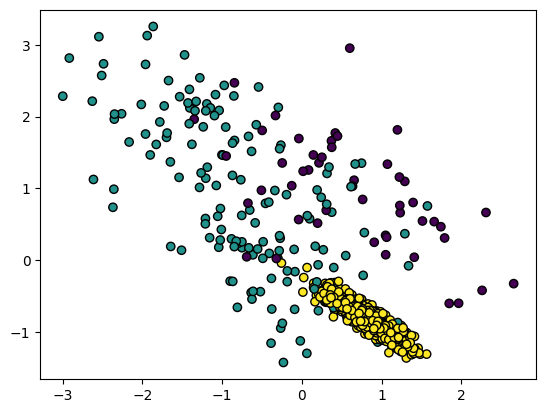

In [40]:
#시각화를 통해 생성한 데이터 확인
fig = plt.Figure(figsize=(12,6))
plt.scatter(data[:, 0], data[:, 1], c=label, linewidth=1, edgecolor='black')
plt.show()

##### 1) 모델 불러오기 및 정의하기

In [41]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=5)

#SMOTE: 소수 클래스를 오버샘플링하는데 사용. k_neighbors: 각 소수 클래스 데이터 포인트에 대해 생성할 합성 데이터의 개수를 결정하는데 사용

In [42]:
!pip install imblearn

##### 2) 3) 데이터에서 특징 찾기(데이터 비율)+데이터 샘플링

In [43]:
smoted_data, smoted_label = smote.fit_resample(data, label) #바로 fit하면 됨

#fit_resemble: SMOTE를 적용하고, 새로운 합성된 데이터와 해당 레이블을 반환

##### 4) 결과 살펴보기 

In [44]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

#오버샘플링을 통해 53 -> 793, 154 -> 793으로 늘어남
#pd.get_dummies(): 각 클래스의 샘플 수 계산, sum(): 각 클래스별 샘플 수 합산 => 오버샘플링을 통해 클래스가 얼마나 증가했는지 확인

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SMOTE 결과 
0    793
1    793
2    793
dtype: int64


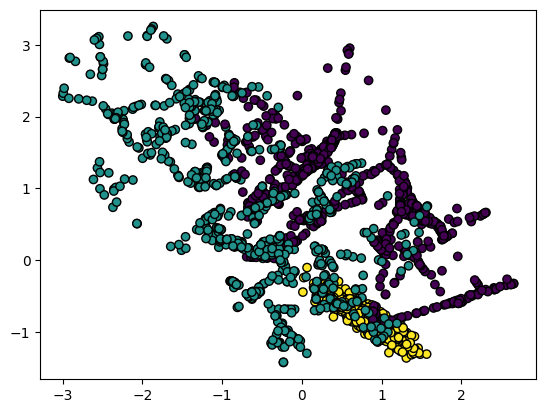

In [45]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:, 0], smoted_data[:, 1], c=smoted_label, linewidth=1, edgecolor='black')
plt.show()

차원 축소(Dimensionality Reduction)

In [46]:
#저차원에서는 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 생겨나는 현상
#데이터의 차원이 너무 큰 경우에는 필요없는 변수를 제거하고, 과적합을 방지하기 위해 데이터의 차원을 축소

주성분 분석(PCA; Principal Component Analysis)

In [47]:
#각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 정규화시켜 동일하게 만들어줌(=스케일링). 대표적인 차원 축소 기법
#여러 차원으로 이루어진 데이터를 가장 잘 표현하는 축으로 사영(projection)해서 차원을 축소
#데이터를 가장 잘 표현하는 축 = 데이터의 분산을 잘 표현하는 축

In [48]:
from sklearn.datasets import load_digits
digits=load_digits()

In [49]:
print(digits.DESCR)
#64차원(8*8) digit(숫자 이미지)데이터를 PCA를 통해 2차원으로 떨어뜨려 시각화

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [50]:
data=digits.data
label=digits.target

In [51]:
data.shape #이미지를 확인하기 위해서는 64차원 벡터 -> 8*8 행렬로 변환

(1797, 64)

Label : 0


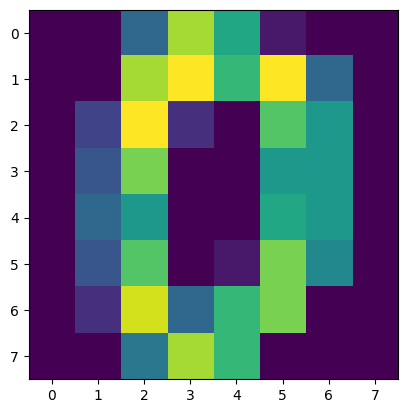

In [52]:
plt.imshow(data[0].reshape((8,8))) #8x8 64차원 -> 2차원으로 축소
print('Label : {}'.format(label[0]))

##### 1) 모델 불러오기 및 정의하기

In [53]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

##### 2) 데이터에서 특징 찾기 (주성분 찾기)

In [54]:
pca.fit(data)

PCA(n_components=2)

##### 3) 데이터 변환 (주성분으로 데이터 사영하기)

In [55]:
new_data = pca.transform(data) #fit이 아닌 transform

##### 4) 결과 살펴보기

In [56]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('\nPCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)

PCA를 거친 데이터의 차원 
(1797, 2)


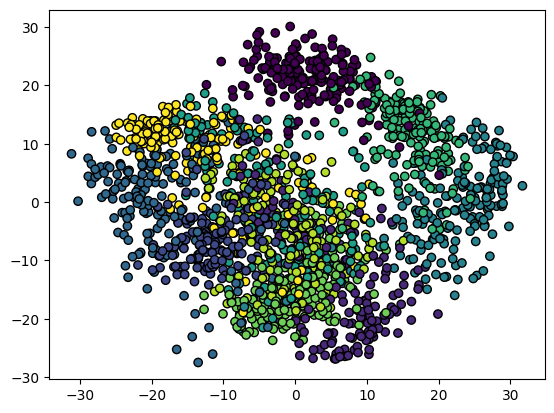

In [57]:
plt.scatter(new_data[:,0], new_data[:, 1], c=label, linewidth=1, edgecolor='black')
plt.show()

1. Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [60]:
#객체 생성
le=LabelEncoder()

In [61]:
le.fit(items)

LabelEncoder()

In [62]:
#인코딩 실행
labels=le.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [63]:
#le2=LabelEncoder()
#labels=le2.fit_transform(items)
#labels

#고수들은 한 줄에 바로 적용
labels = LabelEncoder().fit_transform(items) #한줄에 바로 적용
labels

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [64]:
le.inverse_transform([2,4,3,0,5,1])

array(['믹서', '전자렌지', '선풍기', 'TV', '컴퓨터', '냉장고'], dtype='<U4')

In [65]:
#전복 데이터의 target이었던 성별 변수를 수치형 변수로 변환

data=pd.read_csv(abalone_path, header=None, names=abalone_columns)
label=data['Sex']
del data

In [66]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

##### 1) 모델 불러오기 및 정의하기

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

##### 2) 데이터에서 특징 찾기 (범주의 수)

In [68]:
le.fit(label)

LabelEncoder()

##### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [69]:
label_encoded_label=le.transform(label)

##### 4) 결과 살펴보기

In [70]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded_label.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])
result.head(10)

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
5,I,1
6,F,0
7,F,0
8,M,2
9,F,0


In [71]:
le.inverse_transform(label_encoded_label)

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

2. One-hot Encoding

In [72]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() #초기화
oh_labels = ohe.fit_transform(labels.reshape(-1,1)) #레이블을 열 벡터로 변환 -> 원핫인코딩을 수행해 희소행렬(Sparse Matrix) 형태로 반환
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [73]:
from tensorflow.keras.utils import to_categorical
to_categorical(labels)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [75]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

In [77]:
ohe.fit(label.values.reshape((-1, 1)))

OneHotEncoder(sparse_output=False)

In [78]:
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))

In [79]:
columns = np.concatenate([np.array(['label']) , ohe.categories_[0]])
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 3))], axis=1), 
                      columns=columns) 
result.head(10)

,label,F,I,M
0,M,0.0,0.0,1.0
1,M,0.0,0.0,1.0
2,F,1.0,0.0,0.0
3,M,0.0,0.0,1.0
4,I,0.0,1.0,0.0
5,I,0.0,1.0,0.0
6,F,1.0,0.0,0.0
7,F,1.0,0.0,0.0
8,M,0.0,0.0,1.0
9,F,1.0,0.0,0.0


In [ ]:
#02-08 원-핫 인코딩(One-Hot Encoding) https://wikidocs.net/22647